#### Titanic: Machine Learning from Disaster
##### 2021-7, AI+X 연수, 신기술교육원
##### 한국폴리텍대학 대구캠퍼스 AI엔지니어링

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

##### 학습데이터 로딩

In [2]:
df_train = pd.read_csv("./data/train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### 생존자 / 사망자 숫자

In [3]:
# value count로 확인
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\hwkang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


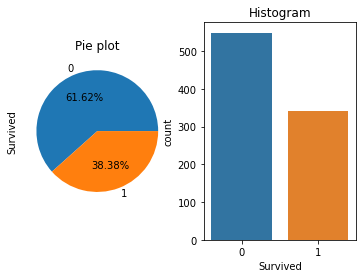

In [6]:
# 파이플롯 / 카운터 플롯으로 시각화
# 그림은 1행 2열
fig, ax = plt.subplots(1,2)

df_train["Survived"].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title("Pie plot")

sns.countplot("Survived", data=df_train,ax=ax[1])
ax[1].set_title("Histogram")
plt.show()

##### 상관관계

In [7]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


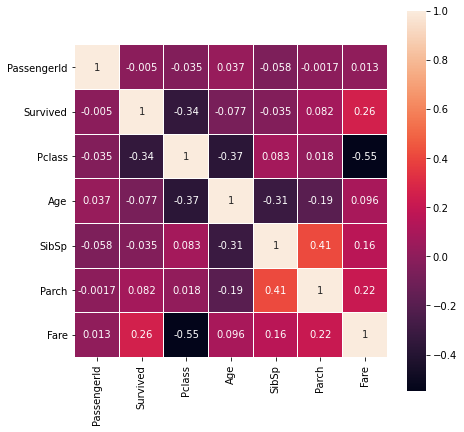

In [8]:
# 상관도 시각화, seaborn의 heatmap 사용
plt.figure(figsize=(7, 7))
sns.heatmap(df_train.corr(), linewidths=0.01, annot=True, square=True)
plt.show()

##### 숫자를 문자로
##### 사람이 보기 쉽게

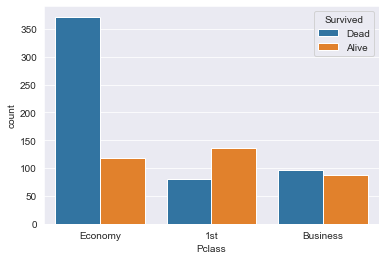

In [9]:
df_train["Pclass"] = df_train["Pclass"]\
.replace(1, "1st")\
.replace(2, "Business")\
.replace(3, "Economy")

df_train["Survived"] = df_train["Survived"]\
.replace(1, "Alive")\
.replace(0, "Dead")

sns.set_style(style="darkgrid")
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.show()

##### Data Frame 분리

In [10]:
# 생존자와 죽은자의 data frame을 분리 했다.
df_survive = df_train.loc[df_train["Survived"] == "Alive"]
df_dead = df_train.loc[df_train["Survived"] == "Dead"]

In [11]:
# 각 칼럼의 인원수 대비 생존자 비율
def show_group_rate(feature):
    sur_info = df_survive[feature].value_counts(sort=False)
    dead_info = df_dead[feature].value_counts(sort=False)
    
    fig = plt.figure()
    plt.title("Survival rete of " + feature)
    
    for i, index in enumerate(sur_info.index):
        
        fig.add_subplot(1, len(sur_info), i+1)
        plt.pie([sur_info[index], dead_info[index]], labels=["Survived", "Dead"], autopct="%0.1f%%")
        plt.title("Survial rate of " + index)
        
    plt.show()

##### 그룹별 생존률 시각화

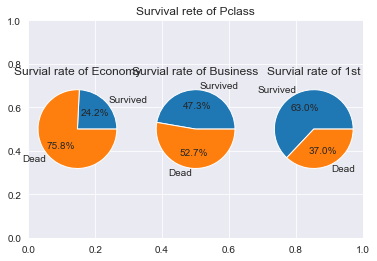

In [12]:
show_group_rate("Pclass")

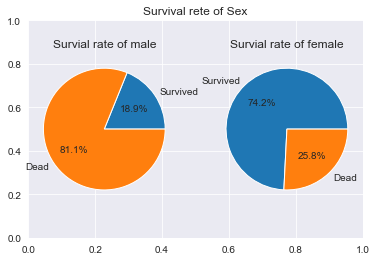

In [13]:
show_group_rate("Sex")

#### 기계학습을 위한 전처리

In [14]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
# 비어있는 값을 채움
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

# Embarked 는 가장 많은 S로 채웠다.
df_train["Embarked"] = df_train["Embarked"].fillna("S")

In [16]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


##### 나이를 그룹별로 설정

In [17]:
for i in range(len(df_train)):
    age = int(df_train.loc[i, "Age"] / 10)
    df_train.loc[i, "Age"] = age

##### 문자 데이터는 숫자로

In [18]:
#문자 데이터를 숫자로 변환하기
df_train["Sex"] = df_train["Sex"].map({"male": 0, "female": 1})
df_train["Embarked"] = df_train["Embarked"].map({"Q": 0, "C": 1, "S": 2})
df_train["Pclass"] = df_train["Pclass"].map({"1st": 1, "Business": 2, "Economy": 3})
df_train["Survived"] = df_train["Survived"].map({"Alive": 1, "Dead": 0})

##### 상관관계가 낮은 칼럼은 삭제

In [19]:
df_train = df_train.drop(["Name", "PassengerId", "Ticket", "Fare", "Cabin"], axis=1)

#### 학습

In [20]:
# 1. 분류기 생성. 여기서는 decision tree
#classifire = DecisionTreeClassifier()
classifire = RandomForestClassifier()
#classifire = LinearSVC()

# 2. 특징데이터와 정답데이터 분리
ground_truth = df_train["Survived"]
train_data = df_train.drop("Survived", axis=1)

# 3. 학습
classifire.fit(train_data, ground_truth)

# 4. 학습 결과 확인
print("Train Accuracy: ", round(classifire.score(train_data, ground_truth), 2))


Train Accuracy:  0.88


#### 테스트 해보기

In [21]:
# 테스트 셋에 대한 결과 생성
df_test = pd.read_csv("data/test.csv")

# 1. 학습 데이터와 똑같은 형태로 만들어준다.
# 결과물 제출시 passengerId는 필요하므로 따로 빼두었다.
pId = df_test["PassengerId"]
df_test = df_test.drop(["Name", "PassengerId", "Ticket", "Fare", "Cabin"], axis=1)

df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Embarked"] = df_test["Embarked"].fillna("S")
df_test["Sex"] = df_test["Sex"].map({"male": 0, "female": 1})
df_test["Embarked"] = df_test["Embarked"].map({"Q": 0, "C": 1, "S": 2})

# 2. 분류기에 넣고 돌린다.
test_result = classifire.predict(df_test)

# 3. 결과물을 만든다.

submit = pd.DataFrame({"PassengerId": pId, "Survived": test_result})
submit.to_csv("data/submit.csv", index=False)